# HW 0 - Intro to Pandas
Credit: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Object Creation


Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.603855,-1.909945,-0.479259,1.702171
2013-01-02,-0.641384,0.495139,-2.020046,0.001336
2013-01-03,2.294530,-0.635708,-0.733891,-0.496177
2013-01-04,-0.640988,-0.463833,0.509944,0.435204
2013-01-05,-2.107043,-0.302788,0.607642,-0.051413
2013-01-06,0.738407,-0.186075,-1.822979,0.718949


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

View the top and bottom rows of the frame:

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.603855,-1.909945,-0.479259,1.702171
2013-01-02,-0.641384,0.495139,-2.020046,0.001336
2013-01-03,2.294530,-0.635708,-0.733891,-0.496177
2013-01-04,-0.640988,-0.463833,0.509944,0.435204
2013-01-05,-2.107043,-0.302788,0.607642,-0.051413


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.640988,-0.463833,0.509944,0.435204
2013-01-05,-2.107043,-0.302788,0.607642,-0.051413
2013-01-06,0.738407,-0.186075,-1.822979,0.718949


Display the index, columns:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [11]:
df.values

array([[ 6.03855125e-01, -1.90994532e+00, -4.79258947e-01,
         1.70217068e+00],
       [-6.41384404e-01,  4.95138800e-01, -2.02004630e+00,
         1.33590618e-03],
       [ 2.29453036e+00, -6.35708166e-01, -7.33890891e-01,
        -4.96176537e-01],
       [-6.40988010e-01, -4.63832592e-01,  5.09944441e-01,
         4.35203799e-01],
       [-2.10704332e+00, -3.02787590e-01,  6.07641843e-01,
        -5.14128288e-02],
       [ 7.38406723e-01, -1.86074719e-01, -1.82297924e+00,
         7.18948901e-01]])

In [12]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

.describe( ) shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.041229,-0.500535,-0.656432,0.385012
std,1.511716,0.791885,1.114987,0.769819
min,-2.107043,-1.909945,-2.020046,-0.496177
25%,-0.641285,-0.592739,-1.550707,-0.038226
50%,-0.018566,-0.383310,-0.606575,0.218270
75%,0.704769,-0.215253,0.262644,0.648013
max,2.294530,0.495139,0.607642,1.702171


Transposing your data:

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.603855,-0.641384,2.294530,-0.640988,-2.107043,0.738407
B,-1.909945,0.495139,-0.635708,-0.463833,-0.302788,-0.186075
C,-0.479259,-2.020046,-0.733891,0.509944,0.607642,-1.822979
D,1.702171,0.001336,-0.496177,0.435204,-0.051413,0.718949


Sorting by an axis:

In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.702171,-0.479259,-1.909945,0.603855
2013-01-02,0.001336,-2.020046,0.495139,-0.641384
2013-01-03,-0.496177,-0.733891,-0.635708,2.294530
2013-01-04,0.435204,0.509944,-0.463833,-0.640988
2013-01-05,-0.051413,0.607642,-0.302788,-2.107043
2013-01-06,0.718949,-1.822979,-0.186075,0.738407


Sorting by values:

In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,0.603855,-1.909945,-0.479259,1.702171
2013-01-03,2.294530,-0.635708,-0.733891,-0.496177
2013-01-04,-0.640988,-0.463833,0.509944,0.435204
2013-01-05,-2.107043,-0.302788,0.607642,-0.051413
2013-01-06,0.738407,-0.186075,-1.822979,0.718949
2013-01-02,-0.641384,0.495139,-2.020046,0.001336


## Selection

### Getting 

Selecting a single column, which yields a Series, equivalent to df.A:

In [19]:
df['A']

2013-01-01    0.603855
2013-01-02   -0.641384
2013-01-03    2.294530
2013-01-04   -0.640988
2013-01-05   -2.107043
2013-01-06    0.738407
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,0.603855,-1.909945,-0.479259,1.702171
2013-01-02,-0.641384,0.495139,-2.020046,0.001336
2013-01-03,2.294530,-0.635708,-0.733891,-0.496177


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.641384,0.495139,-2.020046,0.001336
2013-01-03,2.294530,-0.635708,-0.733891,-0.496177
2013-01-04,-0.640988,-0.463833,0.509944,0.435204


### Selection by label

For getting a cross section using a label:

In [22]:
df.loc[dates[0]]

A    0.603855
B   -1.909945
C   -0.479259
D    1.702171
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [23]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.603855,-1.909945
2013-01-02,-0.641384,0.495139
2013-01-03,2.294530,-0.635708
2013-01-04,-0.640988,-0.463833
2013-01-05,-2.107043,-0.302788
2013-01-06,0.738407,-0.186075


Showing label slicing, both endpoints are included:

In [24]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.641384,0.495139
2013-01-03,2.294530,-0.635708
2013-01-04,-0.640988,-0.463833


Reduction in the dimensions of the returned object:

In [25]:
df.loc['20130102', ['A', 'B']]

A   -0.641384
B    0.495139
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [26]:
df.loc[dates[0], 'A']

0.6038551249768886

For getting fast access to a scalar (equivalent to the prior method):

In [27]:
df.at[dates[0], 'A']

0.6038551249768886

### Selection by position

Select via the position of the passed integers:

In [28]:
df.iloc[3]

A   -0.640988
B   -0.463833
C    0.509944
D    0.435204
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [29]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.640988,-0.463833
2013-01-05,-2.107043,-0.302788


By lists of integer position locations, similar to the numpy/python style:

In [30]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.641384,-2.020046
2013-01-03,2.294530,-0.733891
2013-01-05,-2.107043,0.607642


For slicing rows explicitly:

In [31]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.641384,0.495139,-2.020046,0.001336
2013-01-03,2.294530,-0.635708,-0.733891,-0.496177


For slicing columns explicitly:

In [32]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.909945,-0.479259
2013-01-02,0.495139,-2.020046
2013-01-03,-0.635708,-0.733891
2013-01-04,-0.463833,0.509944
2013-01-05,-0.302788,0.607642
2013-01-06,-0.186075,-1.822979


For getting a value explicitly:

In [33]:
df.iloc[1, 1]

0.49513879986688225

For getting fast access to a scalar (equivalent to the prior method):

In [34]:
df.iat[1, 1]

0.49513879986688225

### Boolean Indexing

Selecting values from a DataFrame where a boolean condition is met.

In [35]:
df[df > 0]

,A,B,C,D
2013-01-01,0.603855,NaN,NaN,1.702171
2013-01-02,NaN,0.495139,NaN,0.001336
2013-01-03,2.294530,NaN,NaN,NaN
2013-01-04,NaN,NaN,0.509944,0.435204
2013-01-05,NaN,NaN,0.607642,NaN
2013-01-06,0.738407,NaN,NaN,0.718949


Using the isin() method for filtering:

In [36]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.603855,-1.909945,-0.479259,1.702171,one
2013-01-02,-0.641384,0.495139,-2.020046,0.001336,one
2013-01-03,2.294530,-0.635708,-0.733891,-0.496177,two
2013-01-04,-0.640988,-0.463833,0.509944,0.435204,three
2013-01-05,-2.107043,-0.302788,0.607642,-0.051413,four
2013-01-06,0.738407,-0.186075,-1.822979,0.718949,three


In [37]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,2.294530,-0.635708,-0.733891,-0.496177,two
2013-01-05,-2.107043,-0.302788,0.607642,-0.051413,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [38]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [39]:
df['F'] = s1

Setting values by label:

In [40]:
df.at[dates[0], 'A'] = 0

Setting values by position:

In [41]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [42]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [43]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479259,5,NaN
2013-01-02,-0.641384,0.495139,-2.020046,5,1.0
2013-01-03,2.294530,-0.635708,-0.733891,5,2.0
2013-01-04,-0.640988,-0.463833,0.509944,5,3.0
2013-01-05,-2.107043,-0.302788,0.607642,5,4.0
2013-01-06,0.738407,-0.186075,-1.822979,5,5.0


A where operation with setting.

In [44]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479259,-5,NaN
2013-01-02,-0.641384,-0.495139,-2.020046,-5,-1.0
2013-01-03,-2.294530,-0.635708,-0.733891,-5,-2.0
2013-01-04,-0.640988,-0.463833,-0.509944,-5,-3.0
2013-01-05,-2.107043,-0.302788,-0.607642,-5,-4.0
2013-01-06,-0.738407,-0.186075,-1.822979,-5,-5.0


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.479259,5,NaN,1.0
2013-01-02,-0.641384,0.495139,-2.020046,5,1.0,1.0
2013-01-03,2.294530,-0.635708,-0.733891,5,2.0,NaN
2013-01-04,-0.640988,-0.463833,0.509944,5,3.0,NaN


** To drop any rows that have missing data. **

In [46]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,-0.641384,0.495139,-2.020046,5,1.0,1.0


Filling missing data.

In [47]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.479259,5,5.0,1.0
2013-01-02,-0.641384,0.495139,-2.020046,5,1.0,1.0
2013-01-03,2.294530,-0.635708,-0.733891,5,2.0,5.0
2013-01-04,-0.640988,-0.463833,0.509944,5,3.0,5.0


To get the boolean mask where values are nan

In [48]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Performing a descriptive statistic:

In [49]:
df.mean()

A   -0.059413
B   -0.182211
C   -0.656432
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [50]:
df.mean(1)

2013-01-01    1.130185
2013-01-02    0.766742
2013-01-03    1.584986
2013-01-04    1.481025
2013-01-05    1.439562
2013-01-06    1.745871
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [51]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [52]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,1.294530,-1.635708,-1.733891,4.0,1.0
2013-01-04,-3.640988,-3.463833,-2.490056,2.0,0.0
2013-01-05,-7.107043,-5.302788,-4.392358,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 

Applying functions to the data:

In [53]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479259,5,NaN
2013-01-02,-0.641384,0.495139,-2.499305,10,1.0
2013-01-03,1.653146,-0.140569,-3.233196,15,3.0
2013-01-04,1.012158,-0.604402,-2.723252,20,6.0
2013-01-05,-1.094885,-0.907190,-2.115610,25,10.0
2013-01-06,-0.356479,-1.093264,-3.938589,30,15.0


### Histrogramming

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    1
2    0
3    2
4    6
5    0
6    5
7    4
8    2
9    5
dtype: int64

In [55]:
s.value_counts()

0    3
2    2
5    2
1    1
4    1
6    1
dtype: int64

### String Method

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [56]:
s = pd.Series(['A', 'B', 'C', 'AaBa', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    AaBa
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [57]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.380325,-0.880526,-1.176924,-0.179586
1,0.291227,1.116187,0.554469,-0.492768
2,1.699139,-0.608916,-0.704861,-0.863620
3,-0.248738,-1.029515,0.091007,-1.283921
4,0.927656,0.290976,-0.133193,-0.841017
5,0.244215,-0.564498,1.555279,-0.878605
6,-1.048047,0.210264,-0.961586,-1.593050
7,-0.697241,-1.359378,1.545611,-1.927015
8,-0.854028,-0.163953,-0.129962,0.004403
9,0.245984,0.800387,0.304697,1.477378


In [59]:
# Break it into pieces
pieces = [df[0:3], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.380325,-0.880526,-1.176924,-0.179586
1,0.291227,1.116187,0.554469,-0.492768
2,1.699139,-0.608916,-0.704861,-0.863620
7,-0.697241,-1.359378,1.545611,-1.927015
8,-0.854028,-0.163953,-0.129962,0.004403
9,0.245984,0.800387,0.304697,1.477378


### Join

SQL style merges

In [60]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another Example:

In [61]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe. 

In [62]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.001153,-1.814441,-1.520158,-2.048174
1,0.265521,-0.123103,-0.742055,1.244682
2,-0.268542,0.870505,0.368634,0.151854
3,0.411732,1.915521,-0.064925,0.169919
4,1.173807,0.788658,-0.096123,-0.847175
5,-0.841019,1.071743,0.744012,0.071097
6,0.358983,-1.069872,-1.282452,1.333018
7,-0.314903,0.507522,-1.372580,-0.060064


In [63]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.001153,-1.814441,-1.520158,-2.048174
1,0.265521,-0.123103,-0.742055,1.244682
2,-0.268542,0.870505,0.368634,0.151854
3,0.411732,1.915521,-0.064925,0.169919
4,1.173807,0.788658,-0.096123,-0.847175
5,-0.841019,1.071743,0.744012,0.071097
6,0.358983,-1.069872,-1.282452,1.333018
7,-0.314903,0.507522,-1.372580,-0.060064
8,0.411732,1.915521,-0.064925,0.169919


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [64]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.849853,0.919800
1,bar,one,-0.993119,0.490020
2,foo,two,-0.737876,1.086789
3,bar,three,1.388501,-0.697871
4,foo,two,-0.172797,-1.672252
5,bar,two,1.190397,-1.379797
6,foo,one,-0.031296,-1.438906
7,foo,three,-1.978317,-0.555656


Grouping and then applying the sum() function to the resulting groups.

In [65]:
df.groupby('A').sum()

,C,D
A,,
bar,1.585779,-1.587649
foo,-3.770139,-1.660224


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [66]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.993119  0.490020
    three  1.388501 -0.697871
    two    1.190397 -1.379797
foo one   -0.881148 -0.519107
    three -1.978317 -0.555656
    two   -0.910673 -0.585462

## Plotting

<AxesSubplot:>

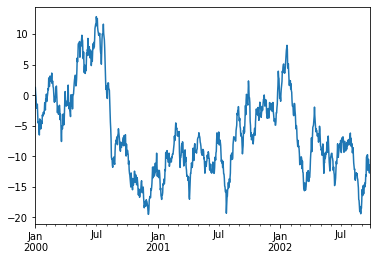

In [67]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

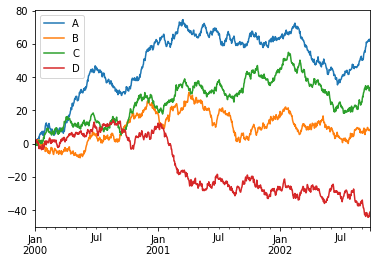

In [68]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()

## Getting data in/out

### CSV

In [69]:
df.to_csv('foo.csv')

In [70]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.449357,0.845010,0.597582,0.693725
1,2000-01-02,-0.977990,0.857001,-0.033241,1.039799
2,2000-01-03,0.051343,0.851306,-0.088908,1.869627
3,2000-01-04,0.033648,0.792420,-0.969570,1.940509
4,2000-01-05,1.813600,1.798851,1.178586,2.378155
